In [ ]:
from key import api_key
import requests
import pandas as pd 

#read all csv files and make the travel destinations be the index
states = pd.read_csv("state_travel.csv")
international = pd.read_csv("international_travel.csv")
#states.head(20)
#international.head(50)

# API Links
#response = requests.get("https://api.openweathermap.org/data/3.0/onecall/overview?lat={lat}&lon={lon}&appid={api_key}")
#api_url = f"https://api.openweathermap.org/data/3.0/onecall/overview?lat={lat}&lon={lon}&appid={api_key}"

# First we'll introduce the project to the user and ask the first questions to start l_ooking at locations
print('Welcome to your Travel Suggestion for 2025! We will match you to a travel destination based on your answers in a few rounds of questions and traveling data results.')
location = input(f"First up, would you like to find a travel location internationally or within the U.S.?") # ERROR HANDLING to ensure answer can only be international or local -> Please enter either 'international' or 'local' for travel locations within the U.S.

Welcome to your Travel Suggestion for 2025! We will match you to a travel destination based on your answers in a few rounds of questions and traveling data results.


In [285]:
# Organize and find top 10 for INTERNATIONAL destinations and LOCAL/U.S. STATE destinations #

#International dataset contains data from 1970-2020 for each country, NaN values, and other components as well. The use of filtering, conditions, and dropping missing values will be needed to help find the 10 countries with the largest amounts of traveling in a year and not including the U.S.
travel_year = international[international['Year'] == 2019] 
countries_only = travel_year[travel_year['Code'].str.len() <= 3].dropna()
international_only = countries_only[countries_only['Code'] != 'USA']
highest_international = international_only.nlargest(10, "Air transport, passengers carried")
highest_international

#State dataset contains only values from 2022 so no filtering by year will be needed. However the dataset does contain multiple categories for each state so we will need to filter in order to only obtain the 'Passenger' values
states_passengers = states[states['Category'] == 'Passengers'].dropna()
states_passengers['2022'] = states_passengers['2022'].str.replace(",", "").round().astype(int)
states_highest = states_passengers.nlargest(10, '2022')
states_highest


,State,Category,2022
48,Florida,Passengers,67633390
24,California,Passengers,65118712
252,Texas,Passengers,64340646
54,Georgia,Passengers,34513197
186,New York,Passengers,30883848
72,Illinois,Passengers,30209478
30,Colorado,Passengers,26437721
192,North Carolina,Passengers,23115318
162,Nevada,Passengers,19211149
276,Washington,Passengers,18077810


You selected to find a travel destination within the U.S.! Here is a look at the top 10 most traveled states within the U.S.:


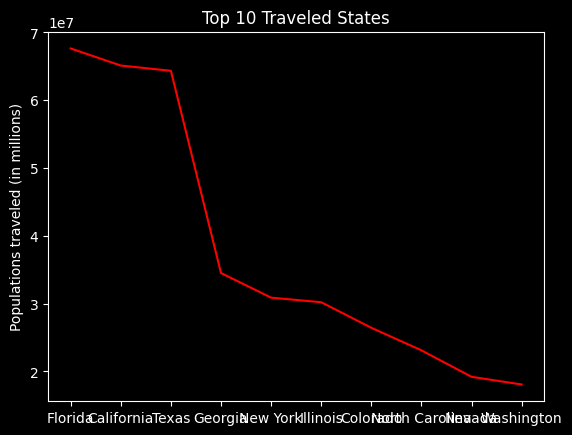

<Figure size 1200x300 with 0 Axes>

In [290]:
# Create visual graphs to show top 10 travel destinations based on what the user selected #
import matplotlib.pyplot as plt
import seaborn as sb

if (location == 'state'):
    print('You selected to find a travel destination within the U.S.! Here is a look at the top 10 most traveled states within the U.S.:')
    
    plt.plot(states_highest['State'], states_highest['2022'], color = 'red')
    plt.title('Top 10 Traveled States')
    plt.ylabel('Populations traveled (in millions)')
    plt.style.use('dark_background')
    plt.figure(figsize=(12, 3))
    plt.show
    
else: 
    print('You selected to find a travel destination internationally! Here is a look at the top 10 most traveled countries around the world:')
    
    plt.scatter(highest_international['Entity'], highest_international['Air transport, passengers carried'], color = 'cyan')
    plt.title('Top 10 Traveled Countries')
    plt.ylabel('Populations traveled (in millions)')
    plt.style.use('dark_background')
    plt.figure(figsize= (12, 3))
    plt.show

In [ ]:
# ask what month do they have in mind?
month = int(input("What month do you plan on traveling?")) # Error handling to ensure answer is a number between 1 and 12 
temp = input("Does your travel have seasons, is sunny all the time, or is snowy and cold?") # Error handling to ensure answer is either 'sunny', 'seasons', or 'snowy'

# PARENT CLASSES #
class international:
    def __int__(self, country, month, capital_city):
        self.country = country
        self.month - month 
        self.capital_city = capital_city
    
    def questions_international(self):

#class local: 

SyntaxError: incomplete input (2542801205.py, line 28)

In [ ]:
# CHILD CLASSES
# ask extra questions: expected price/budget, vacation type, weather and match based on user response answers
# before price/budget ask who will they be traveling with? Select from the options single, family, or with friends? 
# ERROR HANDLING: answer must only be within the three options
# price/budget group the top 10 into expected budget. Let user know we will try to align the location as close as possible but it will be an estimate not an exact factor - use OOP for a round
# vacation type will be csv
# weather will be use of API call month and weather based on state or country. Condition statement will need to be created in order to ensure top 10 locations are placed within the three options and we filter out the options that dont match with response (if they choose sunny vs winter)


In [ ]:

# Final results #

# API usage will include the Open Weather in order to look at current temperatures in matched travel destinations 
# print(f"Congratulations, your Travel 2025 suggestion is in {final_results}! The current weather there today is {final_weather} and it is looking {final_state}. Below you will see further statistics and reports for {final_result}!")
# enter gif throguh giphy image API to lookup matching image to country or state
# data visualization use of graph to show how popular your travel location is in the month you travel vs year
# print(f"Hope you find {final result} as a perfect travel match! Thank you for participating!')
